In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR

In [2]:
class LinearRegression:
    def __init__(self, lr = 0.01, iterations = 1000):
        self.lr = lr
        self.iterations = iterations

    def _get_loss(self, y, yhat):
        return np.linalg.norm(y - yhat) ** 2 / len(y)

    def _gradient_descent(self, data, labels):
        y_hat = data @ self.params
        mse = np.mean(np.square(y_hat - labels))
        grads = np.mean((y_hat - labels) * data, axis = 0, keepdims = True).T
        new_params = self.params - self.lr * grads
        return new_params, mse

    def fit(self, data, labels):
        self.params = np.random.randn(data.shape[1], 1)
        self.loss = []
        for i in range(self.iterations):
            self.params, bce = self._gradient_descent(data, labels)
            self.loss.append(bce)

    def score(self, data, labels):
        y_hat = self.predict(data)
        return self._get_loss(labels, y_hat)

    def predict(self, data):
        return data @ self.params

In [3]:
def plot_labels(val_labels, predicted_labels):

    # Plot the predicted and actual target values
    plt.figure(figsize=(10, 6))
    plt.plot(val_labels, label='Actual', color='blue')
    plt.plot(predicted_labels, label='Predicted', color='red')
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.title('Predicted vs Actual Target Values')
    plt.legend()
    plt.show()

In [4]:
# data
n_samples=1000
d_samples=3
np.random.seed(42) # same output all the time, every device

# X
X=np.random.random((n_samples,d_samples))*2 -1
# y_true
coeff_true=[-10, -15, -7.5]
offset=2
y_true= np.log(X**2) @ coeff_true + offset
# y_noisy
gaussian_noise=np.random.normal(loc=0, scale=10, size=(1000))
y_noisy= y_true+gaussian_noise
# train/test
split=int(n_samples/10 *8)
X_train, X_test= X[0:split,:], X[split:,:]
y_train, y_test= y_noisy[0:split], y_noisy[split:]

In [5]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()
train_data = X_train.copy()#x_scaler.fit_transform(X_train)
train_labels = y_train.copy()[:, None] #y_scaler.fit_transform(y_train[:, None])

val_data = X_test.copy() #x_scaler.fit_transform(X_test)
val_labels = y_test.copy()[:, None] #y_scaler.fit_transform(y_test[:, None])

In [6]:
lr = LinearRegression()
lr.fit(train_data, train_labels)

In [7]:
lr.params

array([[ 3.88307335],
       [-0.14490176],
       [-3.53430282]])

In [8]:
lr.score(val_data, val_labels)

6259.629765039786

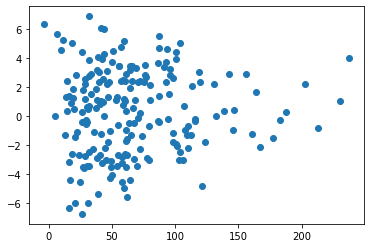

In [9]:
plt.scatter(val_labels, lr.predict(val_data))

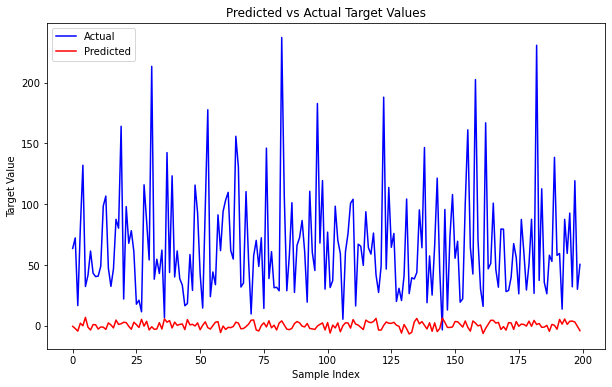

In [10]:
# Get the predictions
predicted_labels = lr.predict(val_data)
plot_labels(val_labels,predicted_labels)

Feature Map 1: Original Features with Bias Term

In [25]:
new_train_data = np.concatenate([np.ones_like(train_labels), train_data], axis = 1)
new_val_data = np.concatenate([np.ones_like(val_labels), val_data], axis = 1)
new_lr = LinearRegression()
new_lr.fit(new_train_data, train_labels)
new_lr.params

array([[65.8912712 ],
       [ 1.58021206],
       [ 1.53040827],
       [-1.61764872]])

In [26]:
new_lr.score(new_val_data, val_labels)

1905.199687784703

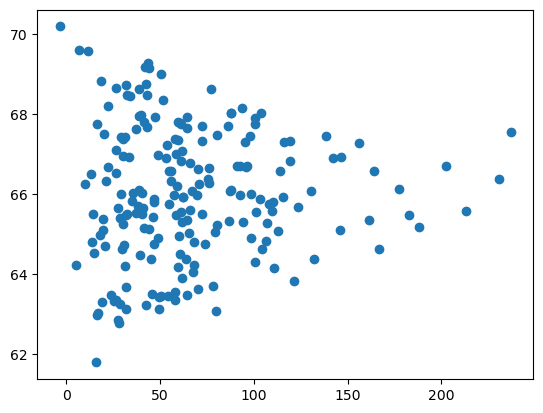

In [27]:
plt.scatter(val_labels, new_lr.predict(new_val_data))

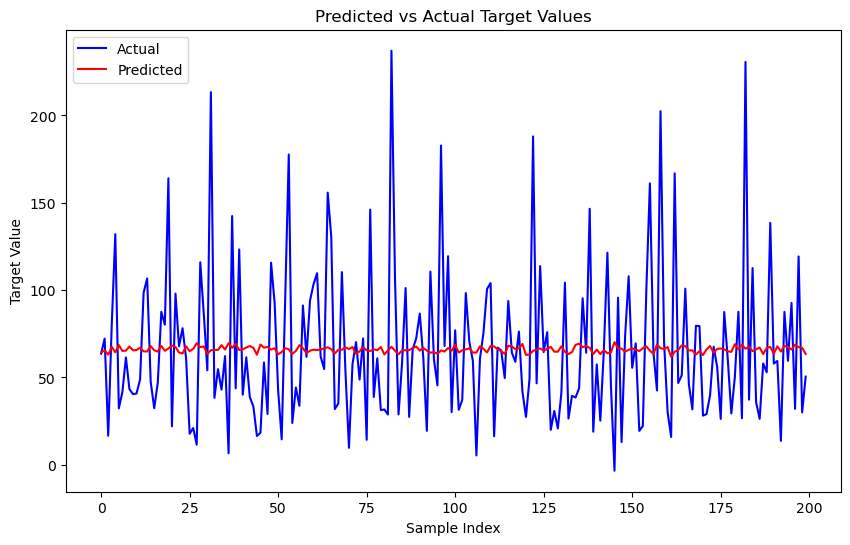

In [30]:
predicted_labels = new_lr.predict(new_val_data)
plot_labels(val_labels,predicted_labels)

Feature Map 2: Sine and Cosine Transformations

In [31]:
new_train_data = np.concatenate([np.ones_like(train_labels), np.sin(2 * np.pi * train_data), np.cos(2 * np.pi * train_data)], axis = 1)
new_val_data = np.concatenate([np.ones_like(val_labels), np.sin(2 * np.pi * val_data), np.cos(2 * np.pi * val_data)], axis = 1)
new_lr = LinearRegression()
new_lr.fit(new_train_data, train_labels)
new_lr.params

array([[65.4093732 ],
       [-0.2585973 ],
       [-2.22738987],
       [ 0.23977945],
       [ 9.15402962],
       [15.00851782],
       [ 6.45653228]])

In [32]:
new_lr.score(new_val_data, val_labels)

1742.5123817398644

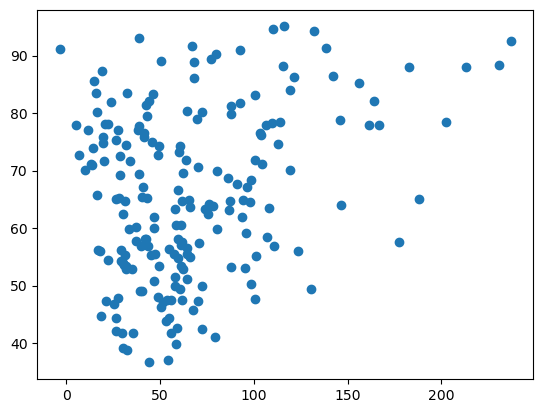

In [33]:
plt.scatter(val_labels, new_lr.predict(new_val_data))

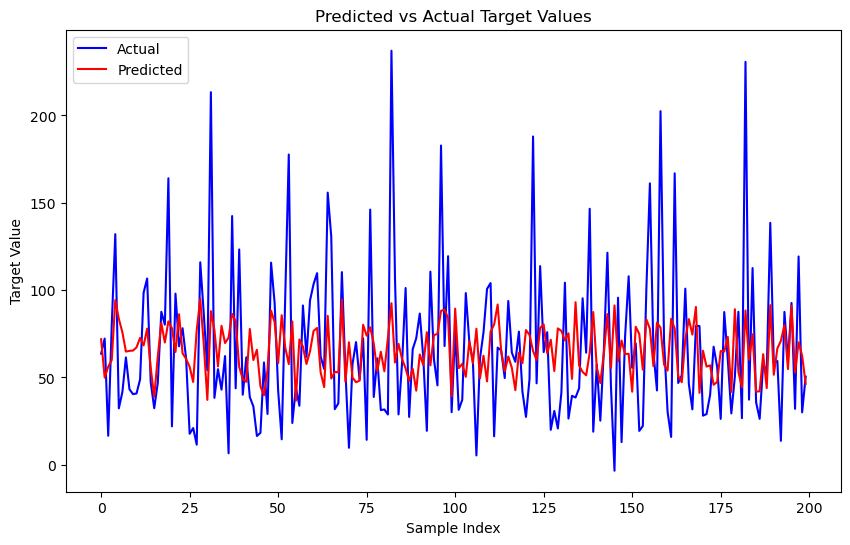

In [34]:
predicted_labels = new_lr.predict(new_val_data)
plot_labels(val_labels,predicted_labels)

Feature Map 3: Logarithmic Transformations

In [35]:
new_train_data = np.concatenate([np.ones_like(train_labels), 2 * np.log1p(train_data)], axis = 1)
new_val_data = np.concatenate([np.ones_like(val_labels), 2 * np.log1p(val_data)], axis = 1)
new_lr = LinearRegression()
new_lr.fit(new_train_data, train_labels)
new_lr.params

array([[70.78493485],
       [ 2.85383737],
       [ 3.83327886],
       [ 1.22966853]])

In [36]:
new_lr.score(new_val_data, val_labels)

1863.331469668215

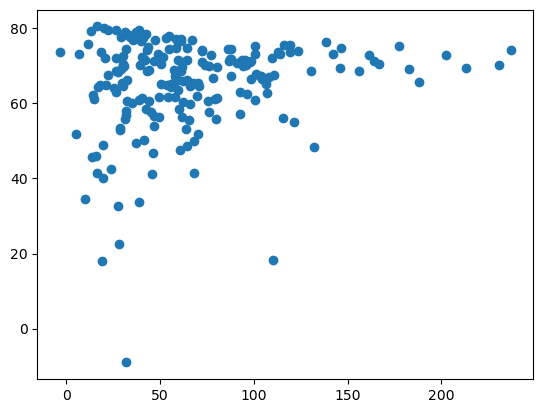

In [37]:
plt.scatter(val_labels, new_lr.predict(new_val_data))

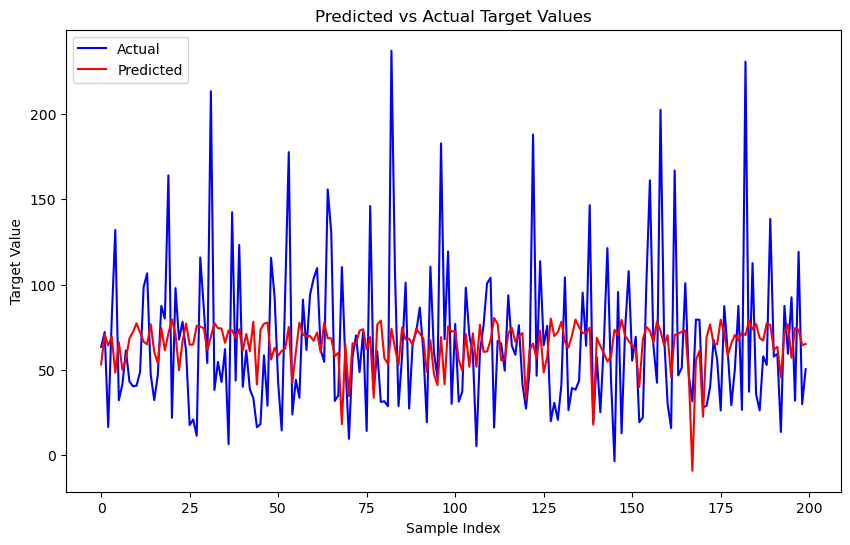

In [38]:
predicted_labels = new_lr.predict(new_val_data)
plot_labels(val_labels,predicted_labels)

Optimal Value for L (Fourier Features)

In [39]:
def get_l_data(data, L):
    return np.concatenate([np.ones((data.shape[0], 1))] + [np.sin(2 ** i * np.pi * data) for i in range(L)] + [np.cos(2 ** i * np.pi * data) for i in range(L)], axis = 1)

In [40]:
loss = []
for i in range(30):
    new_train_data = get_l_data(train_data, i)
    new_val_data = get_l_data(val_data, i)
    lr = LinearRegression()
    lr.fit(new_train_data, train_labels)
    loss.append(lr.score(new_val_data, val_labels))

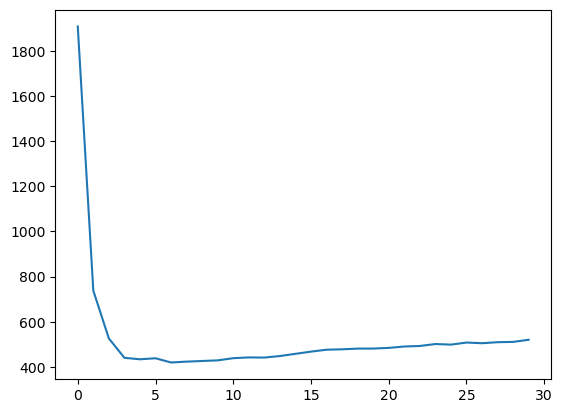

In [41]:
plt.plot(loss)

In [11]:
class KernelLinearRegression:
    def __init__(self, coef = 0.2, kernel = 'rbf', beta = 20, c = 0, alpha = 1, d = 2):
        self.coef = coef
        self.beta = beta
        self.c = c
        self.alpha = alpha
        self.d = d
        kernels = {'rbf': self._rbf_kernel, 'linear': self._linear_kernel, 'poly': self._poly_kernel, 'exp': self._exp_kernel}
        self.__kernel = kernels[kernel]

    def _get_loss(self, y, yhat):
        return np.linalg.norm(y - yhat) ** 2 / len(y)

    def _poly_kernel(self, new_data):
        n_data = new_data if len(new_data.shape) > 1 else new_data[None, ...]
        return (self.alpha * n_data @ self.data.T + self.c) ** self.d

    def _linear_kernel(self, new_data):
        n_data = new_data if len(new_data.shape) > 1 else new_data[None, ...]
        return n_data @ self.data.T + self.c

    def _exp_kernel(self, new_data):
        return np.stack([np.exp(-0.5 * self.beta * np.linalg.norm(self.data - x, axis = 1)) for x in (new_data if len(new_data.shape) > 1 else new_data[None, ...])])

    def _rbf_kernel(self, new_data):
        return np.stack([np.exp(-0.5 * self.beta * np.linalg.norm(self.data - x, axis = 1) ** 2) for x in (new_data if len(new_data.shape) > 1 else new_data[None, ...])])

    def _get_gram(self):
        return np.concatenate([self.__kernel(x) for x in self.data], axis = 0)

    def fit(self, data, labels):
        self.data = data
        gram_mat = self._get_gram()
        self.params = np.linalg.inv(gram_mat + self.coef * np.eye(gram_mat.shape[0])) @ labels

    def score(self, data, labels):
        y_hat = self.predict(data)
        return self._get_loss(labels, y_hat)

    def predict(self, data):
        return self._rbf_kernel(data) @ self.params

In [12]:
klr = KernelLinearRegression()
klr.fit(train_data, train_labels)

In [13]:
klr.score(val_data, val_labels)

397.2455988203357

Finding the Optimal Regularization Term

In [14]:
betas = np.arange(0, 1.01, 0.05)
tr_loss = []
vl_loss = []
for beta in betas:
    klr = KernelLinearRegression(coef = beta)
    klr.fit(train_data, train_labels)
    vl_loss.append(klr.score(val_data, val_labels))
    tr_loss.append(klr.score(train_data, train_labels))

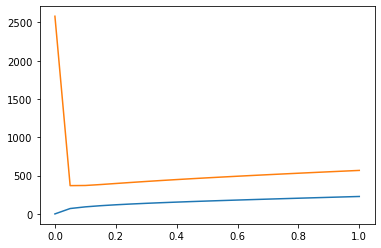

In [15]:
plt.plot(betas, tr_loss)
plt.plot(betas, vl_loss)
plt.show()

In [52]:
optimal_beta = betas[np.argmin(vl_loss)]

In [54]:
optimal_beta

0.05

Fitting the Model with Optimal Regularization Term and Predicting Labels

In [16]:
klr = KernelLinearRegression(coef = 0.05)
klr.fit(train_data, train_labels)

In [17]:
print("optimal_test_score: ",klr.score(val_data, val_labels))

optimal_test_score:  369.40609775909354


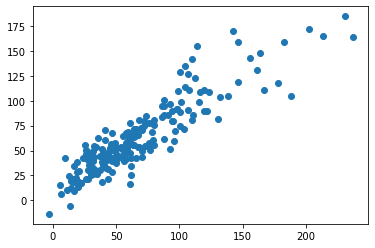

In [18]:
plt.scatter(val_labels, klr.predict(val_data))

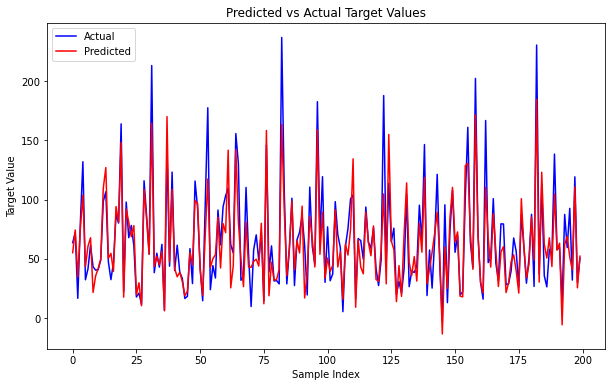

In [19]:
predicted_labels = klr.predict(val_data)
plot_labels(val_labels,predicted_labels)

In [ ]:
klr = KernelLinearRegression(kernel = 'exp')
klr.fit(train_data, train_labels)

In [ ]:
klr.score(val_data, val_labels)

58362.72937817652

In [ ]:
betas = np.arange(0, 1.01, 0.05)
tr_loss = []
vl_loss = []
for beta in betas:
    klr = KernelLinearRegression(kernel = 'exp', coef = beta)
    klr.fit(train_data, train_labels)
    vl_loss.append(klr.score(val_data, val_labels))
    tr_loss.append(klr.score(train_data, train_labels))

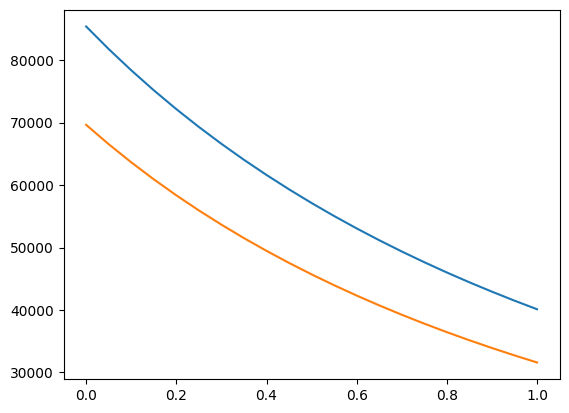

In [ ]:
plt.plot(betas, tr_loss)
plt.plot(betas, vl_loss)
plt.show()

In [21]:
klr = KernelLinearRegression(kernel = 'exp', coef = 1.0)
klr.fit(train_data, train_labels)

In [22]:
klr.score(val_data, val_labels)

31594.311332053527

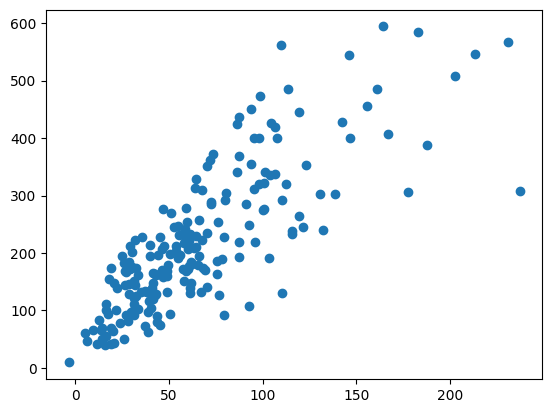

In [ ]:
plt.scatter(val_labels, klr.predict(val_data))

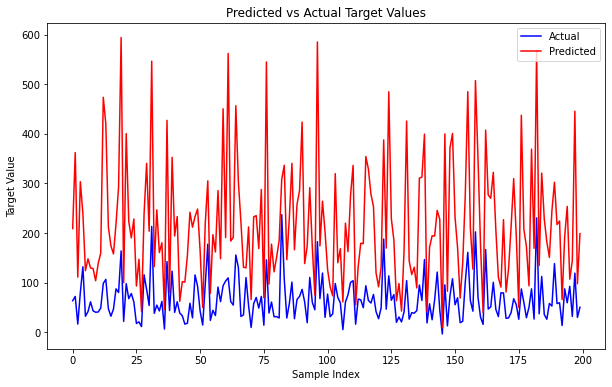

In [23]:
predicted_labels = klr.predict(val_data)
plot_labels(val_labels,predicted_labels)

In [ ]:
klr = KernelLinearRegression(kernel = 'linear')
klr.fit(train_data, train_labels)

In [ ]:
klr.score(val_data, val_labels)

25208086.601592347

In [ ]:
cs = np.arange(0, 1.01, 0.05)
tr_loss = []
vl_loss = []
for beta in betas:
    klr = KernelLinearRegression(kernel = 'linear', coef = beta, c = 0.1)
    klr.fit(train_data, train_labels)
    vl_loss.append(klr.score(val_data, val_labels))
    tr_loss.append(klr.score(train_data, train_labels))

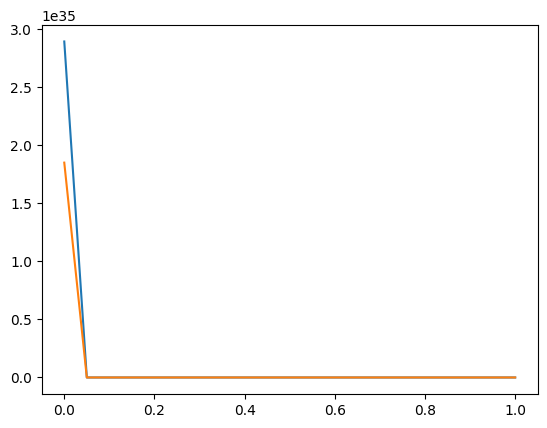

In [ ]:
plt.plot(betas, tr_loss)
plt.plot(betas, vl_loss)
plt.show()

In [24]:
klr = KernelLinearRegression(kernel = 'linear', coef = 0.05, c = 0.05)
klr.fit(train_data, train_labels)

In [25]:
klr.score(val_data, val_labels)

48067364.84017022

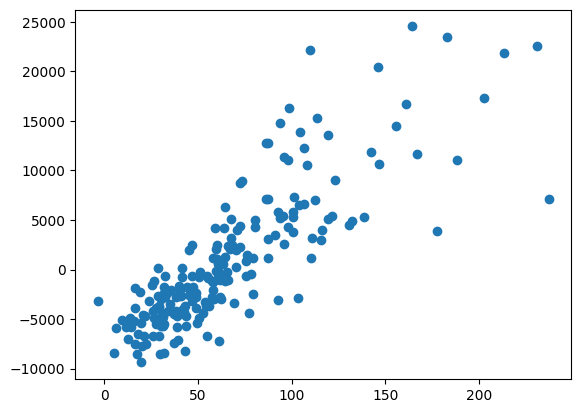

In [ ]:
plt.scatter(val_labels, klr.predict(val_data))

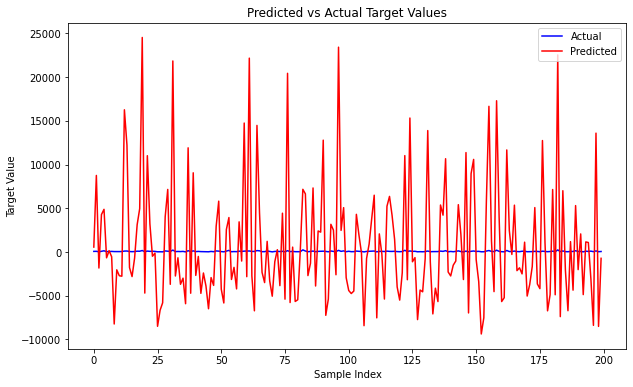

In [26]:
predicted_labels = klr.predict(val_data)
plot_labels(val_labels,predicted_labels)

In [ ]:
klr = KernelLinearRegression(kernel = 'poly')
klr.fit(train_data, train_labels)

In [ ]:
klr.score(val_data, val_labels)

12431137.831786558

In [ ]:
betas = np.arange(0, 1.01, 0.05)
tr_loss = []
vl_loss = []
for beta in betas:
    klr = KernelLinearRegression(kernel = 'poly', coef = beta, d = 4, c = 0.3)
    klr.fit(train_data, train_labels)
    vl_loss.append(klr.score(val_data, val_labels))
    tr_loss.append(klr.score(train_data, train_labels))

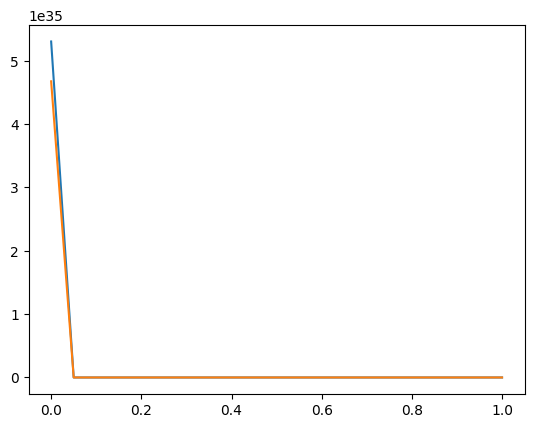

In [ ]:
plt.plot(betas, tr_loss)
plt.plot(betas, vl_loss)
plt.show()

In [27]:
klr = KernelLinearRegression(kernel = 'poly', c = 0.3, d = 4, coef = 0.05)
klr.fit(train_data, train_labels)

In [28]:
klr.score(val_data, val_labels)

1804188.9771855725

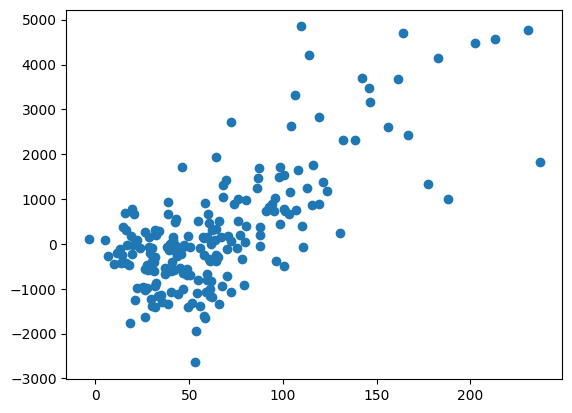

In [ ]:
plt.scatter(val_labels, klr.predict(val_data))

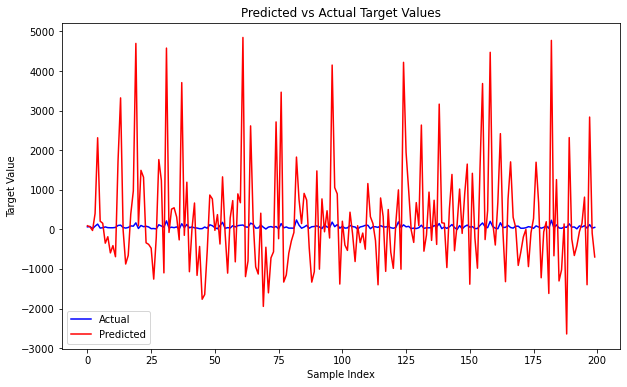

In [29]:
predicted_labels = klr.predict(val_data)
plot_labels(val_labels,predicted_labels)

In [98]:
betas = np.arange(0, 1.01, 0.05)
tr_loss = []
vl_loss = []
new_train_data = np.concatenate([np.ones_like(train_labels), np.sin(2 * np.pi * train_data), np.cos(2 * np.pi * train_data)], axis = 1)
new_val_data = np.concatenate([np.ones_like(val_labels), np.sin(2 * np.pi * val_data), np.cos(2 * np.pi * val_data)], axis = 1)
for beta in betas:
    klr = KernelLinearRegression(coef = beta)
    klr.fit(new_train_data, train_labels)
    vl_loss.append(klr.score(new_val_data, val_labels))
    tr_loss.append(klr.score(new_train_data, train_labels))

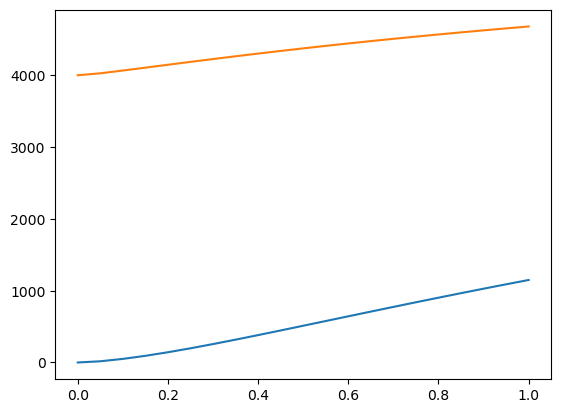

In [99]:
plt.plot(betas, tr_loss)
plt.plot(betas, vl_loss)
plt.show()

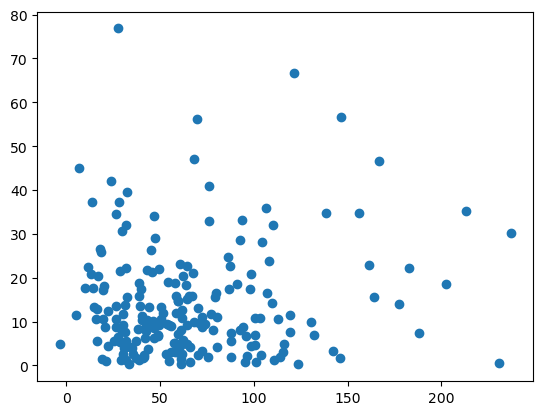

In [100]:
plt.scatter(val_labels, klr.predict(new_val_data))